In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [96]:
df_train =  pd.read_csv("DataForEDAandFeatureSelection/RUL_train_FD003.csv")
id  = df_train.iloc[:, 0]
df = df_train.drop(columns=["ID"])
df_test = pd.read_csv("DataForEDAandFeatureSelection/RUL_test_FD003.csv")
df

,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,SM6,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL
0,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,21.61,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258
1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,21.61,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257
2,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,21.61,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256
3,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,21.61,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255
4,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,21.61,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,21.61,...,2388.30,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,4
24716,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,21.61,...,2388.28,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,3
24717,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,21.61,...,2388.24,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,2
24718,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,21.61,...,2388.26,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,1


In [97]:
df.describe()

,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,SM6,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL
count,24720.000000,24720.000000,24720.000000,24720.0,2.472000e+04,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,...,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000,24720.000000
mean,139.077063,-0.000024,0.000005,100.0,5.186700e+02,642.457858,1588.079175,1404.471212,1.462000e+01,21.595841,...,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024,138.077063
std,98.846675,0.002194,0.000294,0.0,6.684921e-11,0.523031,6.810418,9.773178,3.602525e-12,0.018116,...,0.158121,16.504118,0.060512,1.750371e-14,1.761459,0.0,0.0,0.248865,0.149234,98.846675
min,1.000000,-0.008600,-0.000600,100.0,5.186700e+02,640.840000,1564.300000,1377.060000,1.462000e+01,21.450000,...,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600,0.000000
25%,62.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.080000,1583.280000,1397.187500,1.462000e+01,21.580000,...,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200,61.000000
50%,124.000000,-0.000000,-0.000000,100.0,5.186700e+02,642.400000,1587.520000,1402.910000,1.462000e+01,21.600000,...,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600,123.000000
75%,191.000000,0.001500,0.000300,100.0,5.186700e+02,642.790000,1592.412500,1410.600000,1.462000e+01,21.610000,...,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300,190.000000
max,525.000000,0.008600,0.000700,100.0,5.186700e+02,645.110000,1615.390000,1441.160000,1.462000e+01,21.610000,...,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500,524.000000


In [98]:
df.nunique(axis=0)  #Count distinct observations over requested axis.

Cycle      525
OpSet1     160
OpSet2      14
OpSet3       1
SM1          1
SM2        334
SM3       3358
SM4       4383
SM5          1
SM6         17
SM7       1854
SM8        161
SM9       7114
SM10         4
SM11       170
SM12      1772
SM13       163
SM14      6320
SM15      3122
SM16         1
SM17        12
SM18         1
SM19         1
SM20       165
SM21      6440
RUL        525
dtype: int64

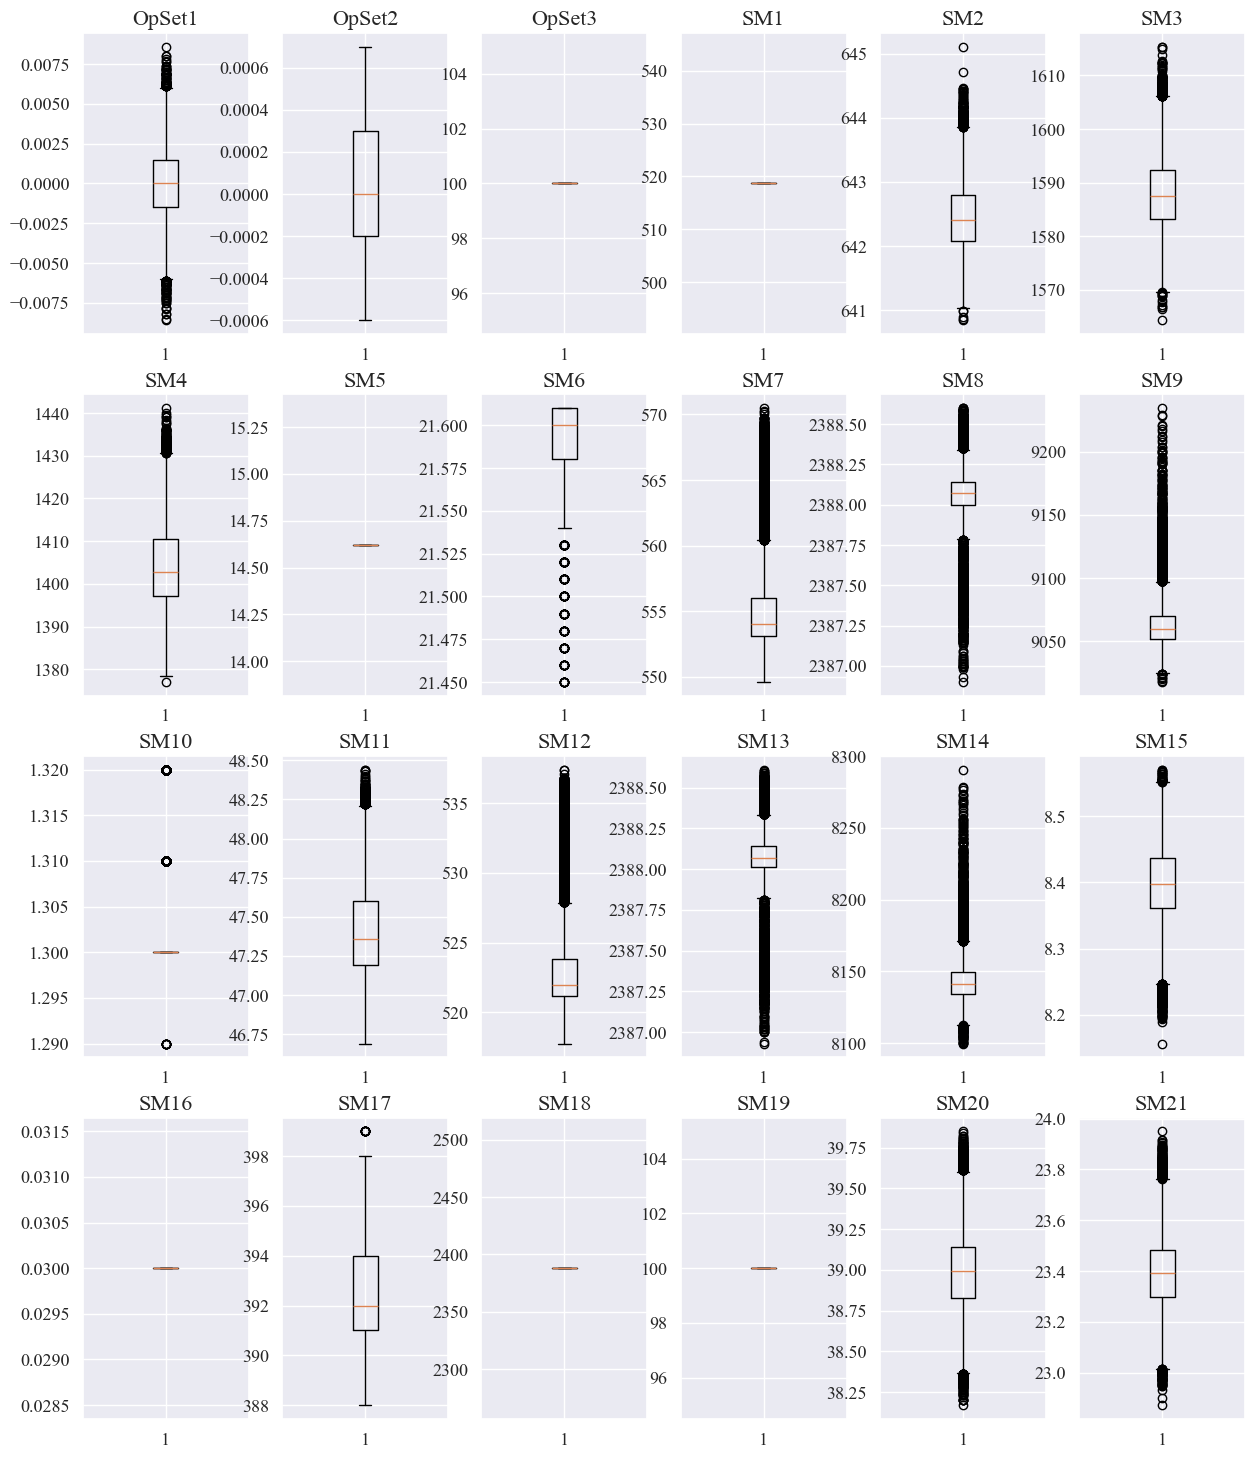

In [99]:
fig = plt.figure(figsize=(15, 18))
for i in np.arange(1, 25):
    temp = df.iloc[:, i]
    ax = plt.subplot(4,6, i)
    ax.boxplot(temp)
    ax.set_title(df.columns[i], fontsize=16)
    ax.tick_params(axis='both', labelsize=13)
# plt.tight_layout()
plt.savefig("IMP_Visuals/FD003/BoxPlt_for_FeatureSelection_FD003.png", bbox_inches='tight')
plt.show()

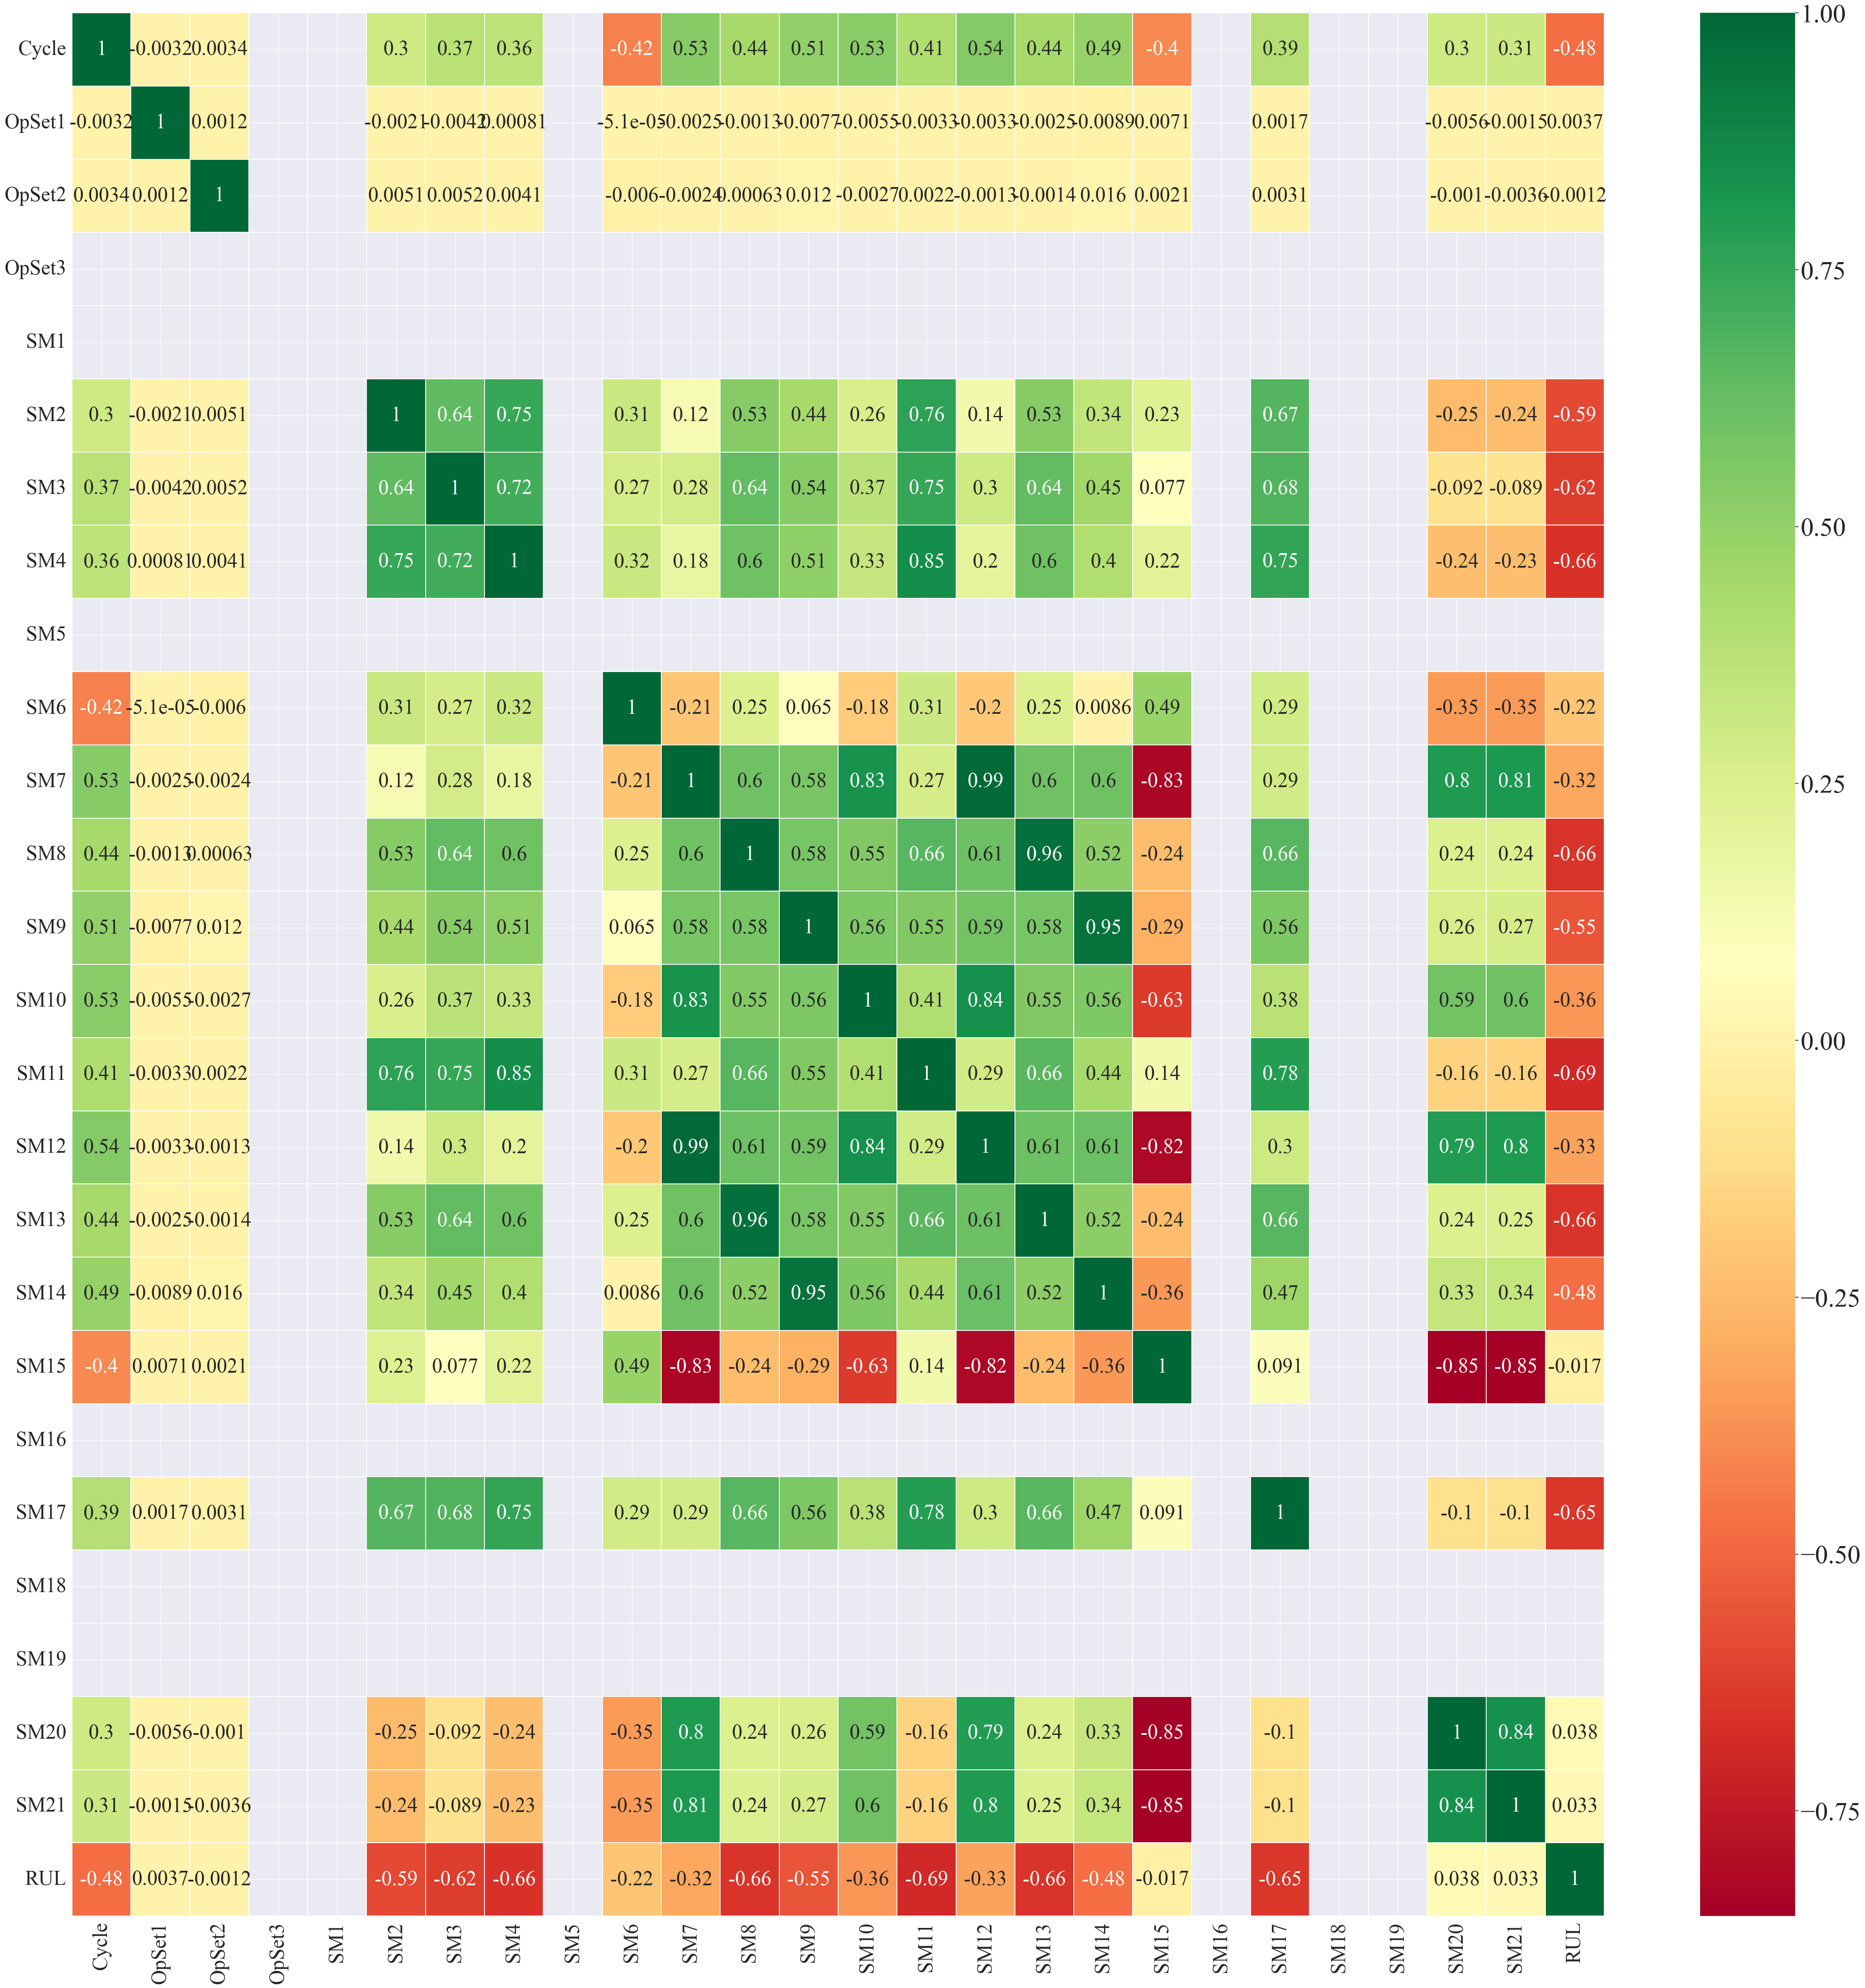

In [100]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
#plt.savefig('Corrplot.png',bbox_inches='tight')
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)
plt.savefig("IMP_Visuals/FD003/OverallCorrelationHeatmap_FD003.png")

In [101]:
delete_columns = []
for col in df.columns:
    corr = df[col].corr(df["RUL"])
    # FD001 min_value = 0.5
    # FD002 min_value = 0.01
    # FD003 min_value = 0.45
    # FD004 min_value = 0.01
    if abs(corr)>0.45:
        pass
    else:
        delete_columns.append(col)

delete_columns

c:\Users\Ayush Sharma\miniconda3\envs\ml-env\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Ayush Sharma\miniconda3\envs\ml-env\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


['OpSet1',
 'OpSet2',
 'OpSet3',
 'SM1',
 'SM5',
 'SM6',
 'SM7',
 'SM10',
 'SM12',
 'SM15',
 'SM16',
 'SM18',
 'SM19',
 'SM20',
 'SM21']

In [102]:
new_df = df.drop(columns=delete_columns)
new_df

,Cycle,SM2,SM3,SM4,SM8,SM9,SM11,SM13,SM14,SM17,RUL
0,1,642.36,1583.23,1396.84,2387.96,9062.17,47.30,2388.01,8145.32,391,258
1,2,642.50,1584.69,1396.89,2388.00,9061.78,47.23,2388.03,8152.85,392,257
2,3,642.18,1582.35,1405.61,2388.03,9070.23,47.22,2388.00,8150.17,391,256
3,4,642.92,1585.61,1392.27,2388.00,9064.57,47.24,2388.08,8146.56,392,255
4,5,641.68,1588.63,1397.65,2388.04,9076.14,47.15,2388.03,8147.80,392,254
...,...,...,...,...,...,...,...,...,...,...,...
24715,148,643.78,1596.01,1424.11,2388.25,9070.82,48.27,2388.30,8138.08,394,4
24716,149,643.29,1596.38,1429.14,2388.23,9064.60,48.13,2388.28,8144.36,395,3
24717,150,643.84,1604.53,1431.41,2388.25,9063.45,48.18,2388.24,8135.95,396,2
24718,151,643.94,1597.56,1426.57,2388.26,9062.22,48.05,2388.26,8141.24,395,1


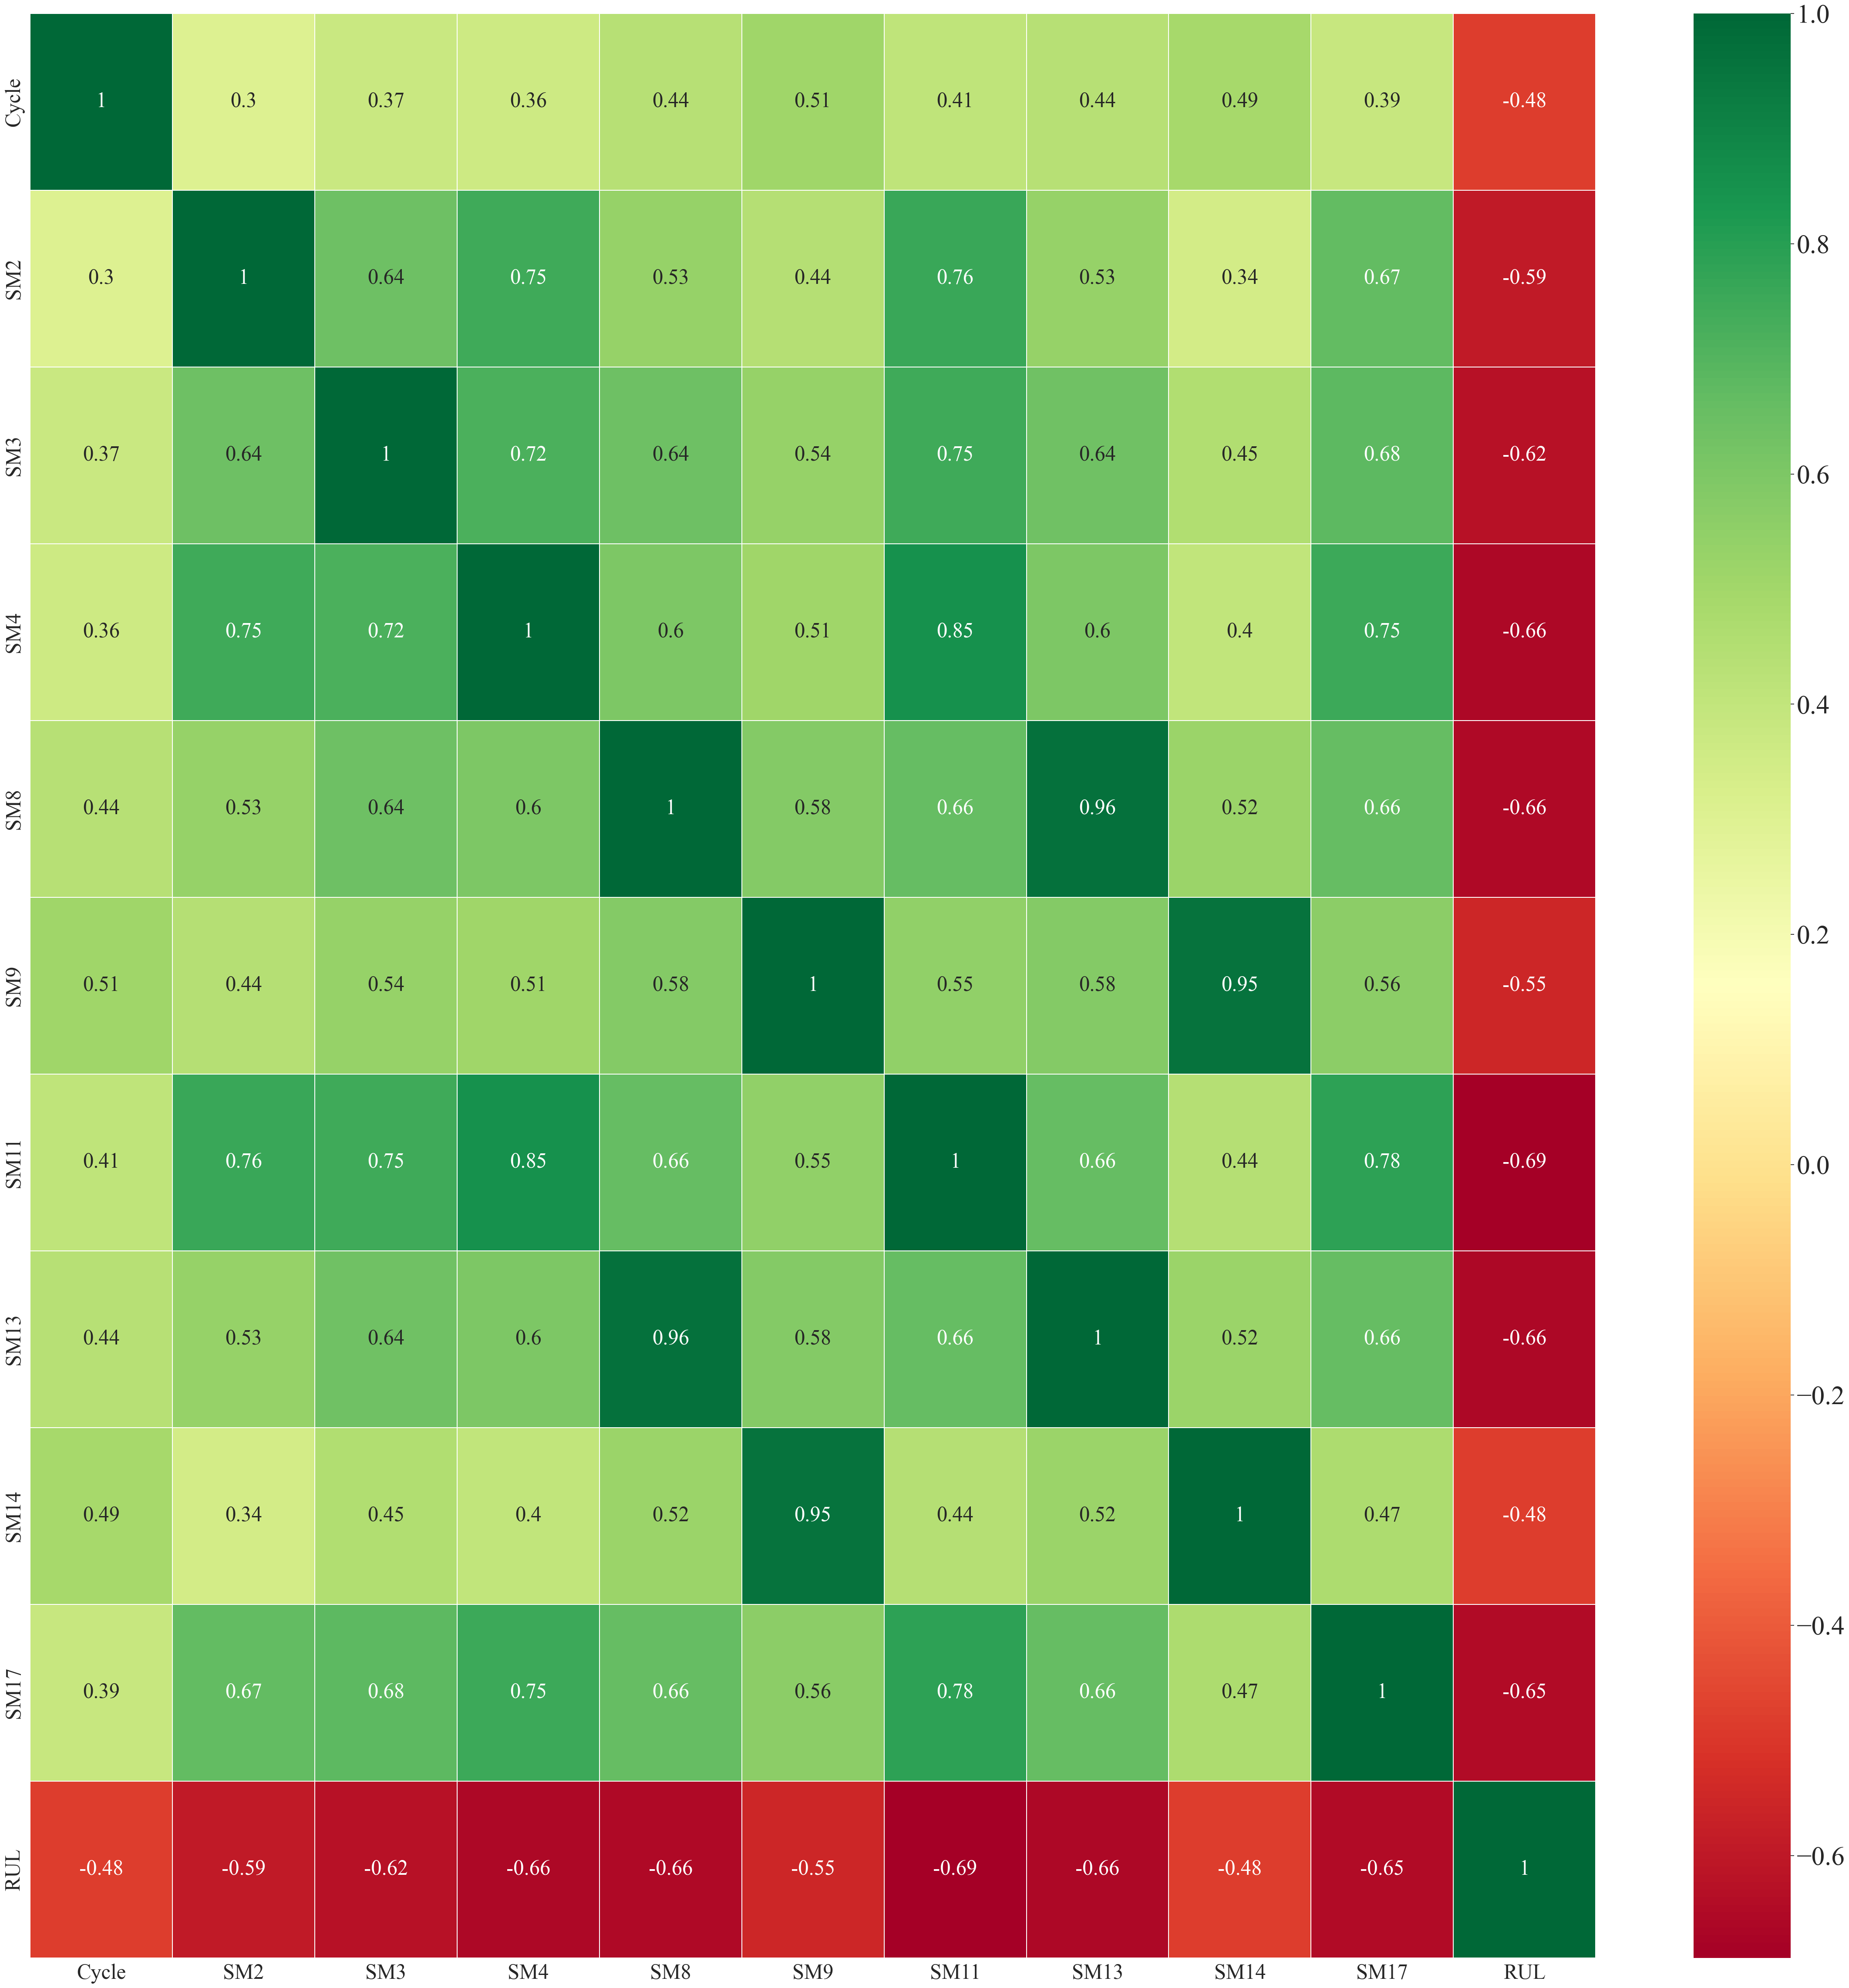

In [103]:
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(new_df[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)
plt.savefig("IMP_Visuals/FD003/CorrelationHeatmapTopfeat_FD003.png")

# Extra Tree Regression for Feature Selection

In [104]:
X = new_df.iloc[:, 0:10]
y = new_df.iloc[:, 10]


from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.13209885 0.0571774  0.06453627 0.11557881 0.09827662 0.0805154
 0.19897755 0.10166513 0.07121417 0.07995981]


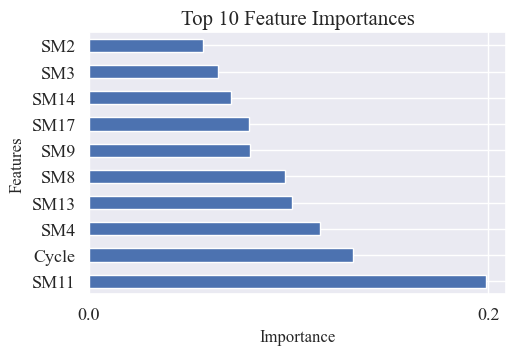

In [105]:
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances=feat_importances.sort_values( ascending=False)
ax = feat_importances.nlargest(13).plot(kind='barh', fontsize=13)

ax.set_title("Top 10 Feature Importances", fontsize=15)
ax.set_xlabel("Importance", fontsize=12)
ax.set_ylabel("Features", fontsize=12)


plt.tight_layout()
plt.savefig('IMP_Visuals/FD003/Feature_importances_FD003.png', dpi=300, bbox_inches='tight')
plt.show()

In [106]:
X = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred_train = regressor.predict(X_train)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

RMSE on Test set: 67.8958350291103
RMSE on Training set: 19.84071283245232


# Forward Feature Selection

In [107]:
feat_importances.keys()

Index(['SM11', 'Cycle', 'SM4', 'SM13', 'SM8', 'SM9', 'SM17', 'SM14', 'SM3',
       'SM2'],
      dtype='object')

In [108]:
feat_imp_df = new_df[feat_importances.keys()]
feat_imp_df

,SM11,Cycle,SM4,SM13,SM8,SM9,SM17,SM14,SM3,SM2
0,47.30,1,1396.84,2388.01,2387.96,9062.17,391,8145.32,1583.23,642.36
1,47.23,2,1396.89,2388.03,2388.00,9061.78,392,8152.85,1584.69,642.50
2,47.22,3,1405.61,2388.00,2388.03,9070.23,391,8150.17,1582.35,642.18
3,47.24,4,1392.27,2388.08,2388.00,9064.57,392,8146.56,1585.61,642.92
4,47.15,5,1397.65,2388.03,2388.04,9076.14,392,8147.80,1588.63,641.68
...,...,...,...,...,...,...,...,...,...,...
24715,48.27,148,1424.11,2388.30,2388.25,9070.82,394,8138.08,1596.01,643.78
24716,48.13,149,1429.14,2388.28,2388.23,9064.60,395,8144.36,1596.38,643.29
24717,48.18,150,1431.41,2388.24,2388.25,9063.45,396,8135.95,1604.53,643.84
24718,48.05,151,1426.57,2388.26,2388.26,9062.22,395,8141.24,1597.56,643.94


In [109]:
no_of_features = []
test_RMSE = []
train_RMSE = []

for i in range(1,10):
    no_of_features.append(i)

    X = feat_imp_df.iloc[:, :i]
    y = feat_imp_df.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)

    print("No. of Features used: ", i)

    y_pred = regressor.predict(X_test)
    test_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    y_pred_train = regressor.predict(X_train)
    train_RMSE.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    
    print('\n')

No. of Features used:  1
RMSE on Test set: 0.3368074180590855
RMSE on Training set: 0.33456172073162366


No. of Features used:  2
RMSE on Test set: 0.38258481227342084
RMSE on Training set: 0.2054506700038624


No. of Features used:  3
RMSE on Test set: 0.3441166036505716
RMSE on Training set: 0.12809752909415933


No. of Features used:  4
RMSE on Test set: 0.3319205442545218
RMSE on Training set: 0.1230396712912895


No. of Features used:  5
RMSE on Test set: 0.3278565892226095
RMSE on Training set: 0.1220295800229876


No. of Features used:  6
RMSE on Test set: 0.322419381001117
RMSE on Training set: 0.12027582255424464


No. of Features used:  7
RMSE on Test set: 0.3225611459964672
RMSE on Training set: 0.11957296910393879


No. of Features used:  8
RMSE on Test set: 0.31989163047314173
RMSE on Training set: 0.11890992533996966


No. of Features used:  9
RMSE on Test set: 0.3190507643282593
RMSE on Training set: 0.11821422134770193




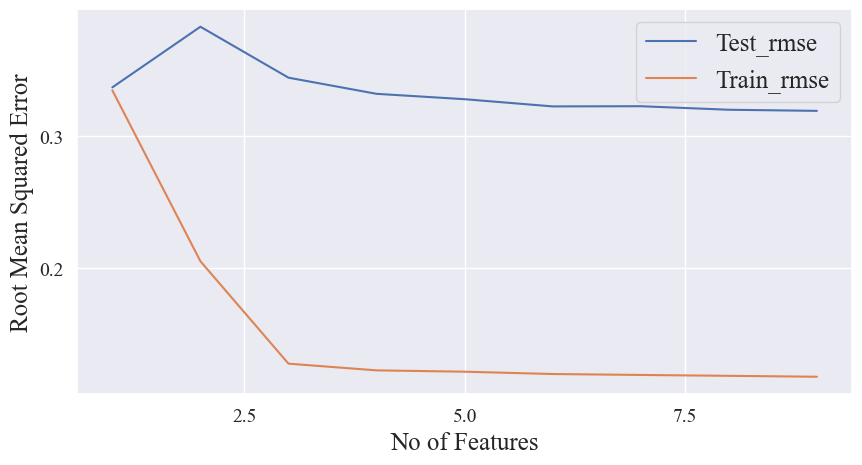

In [110]:
plt.figure(figsize = (10, 5))
plt.plot(no_of_features,test_RMSE)
plt.plot(no_of_features,train_RMSE)
plt.xlabel("No of Features", fontsize=18)
plt.ylabel("Root Mean Squared Error", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Test_rmse','Train_rmse'], loc='upper right',prop={'size': 18})
plt.savefig("IMP_Visuals/FD003/RMSE vs No. of features_FD003.png")
plt.show()

# Exporting Processed Data with selected Features

## For FD001 train and test

In [111]:
# del delete_columns[0:3]
df_train = pd.read_csv("DataForEDAandFeatureSelection/RUL_train_FD003.csv")
df_train = df_train.drop(columns=delete_columns)
df_test = pd.read_csv("DataForEDAandFeatureSelection/RUL_test_FD003.csv")
df_test = df_test.drop(columns=delete_columns)
df_train

,ID,Cycle,SM2,SM3,SM4,SM8,SM9,SM11,SM13,SM14,SM17,RUL
0,1,1,642.36,1583.23,1396.84,2387.96,9062.17,47.30,2388.01,8145.32,391,258
1,1,2,642.50,1584.69,1396.89,2388.00,9061.78,47.23,2388.03,8152.85,392,257
2,1,3,642.18,1582.35,1405.61,2388.03,9070.23,47.22,2388.00,8150.17,391,256
3,1,4,642.92,1585.61,1392.27,2388.00,9064.57,47.24,2388.08,8146.56,392,255
4,1,5,641.68,1588.63,1397.65,2388.04,9076.14,47.15,2388.03,8147.80,392,254
...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,643.78,1596.01,1424.11,2388.25,9070.82,48.27,2388.30,8138.08,394,4
24716,100,149,643.29,1596.38,1429.14,2388.23,9064.60,48.13,2388.28,8144.36,395,3
24717,100,150,643.84,1604.53,1431.41,2388.25,9063.45,48.18,2388.24,8135.95,396,2
24718,100,151,643.94,1597.56,1426.57,2388.26,9062.22,48.05,2388.26,8141.24,395,1


In [62]:
df_test

,ID,Cycle,OpSet1,OpSet2,OpSet3,SM3,SM4,SM9,SM11,SM14,SM15,SM16,SM17,RUL
0,1,1,9.9987,0.2502,100.0,1497.17,1304.99,8763.80,45.61,8114.10,8.6476,0.03,369,275
1,1,2,20.0026,0.7000,100.0,1481.20,1246.11,8713.21,44.26,8053.06,9.2405,0.02,364,274
2,1,3,35.0045,0.8400,100.0,1359.08,1128.36,8340.20,41.80,8053.04,9.3472,0.02,333,273
3,1,4,42.0066,0.8410,100.0,1349.69,1127.89,8313.85,42.21,8066.90,9.3961,0.02,332,272
4,1,5,24.9985,0.6213,60.0,1253.18,1050.69,7997.13,36.76,7865.66,10.8682,0.02,305,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,1366.01,1129.47,8367.35,41.96,8088.36,9.3215,0.02,334,55
33987,259,120,42.0066,0.8405,100.0,1351.13,1123.86,8339.94,42.00,8108.48,9.3542,0.02,332,54
33988,259,121,42.0061,0.8400,100.0,1349.14,1118.91,8341.70,42.15,8098.77,9.3836,0.02,331,53
33989,259,122,0.0024,0.0003,100.0,1589.61,1408.16,9077.35,47.47,8161.85,8.4279,0.03,393,52


In [112]:
df_train.to_csv("Processed Data for RUL Pred/Processed_train_FD003.csv", index = False)
df_test.to_csv("Processed Data for RUL Pred/Processed_test_FD003.csv", index = False)